## Modules

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
import sys
import netCDF4 as nc
#sys.path.append(os.getcwd()+'/conditional-stats/src/')
sys.path.insert(0, os.getcwd()+'/../../conditional-stats/src/')
sys.path.insert(0, os.getcwd()+'/../../conditional-stats/plotting/src/')
import conditionalstats as cs
from plot1DInvLog import *
from plot1D import *

#### Collect Data 

In [2]:
nc_rcemip1 = nc.Dataset("/bdd/MT_WORKSPACE/REMY/RCEMIP/SAM/300K/rcemip_large_2048x128x74_3km_12s_300K_64.2Dcom_2.nc")

In [3]:
nc1 = nc_rcemip1
prec = nc1["Prec"][:]
print(nc1["Prec"])

<class 'netCDF4._netCDF4.Variable'>
float32 Prec(time, y, x)
    long_name: Surface Precip. Rate
    units: mm/day
unlimited dimensions: time
current shape = (201, 128, 2048)
filling on, default _FillValue of 9.969209968386869e+36 used


In [4]:
print(np.shape(prec))
prec_over_time = np.mean(prec[:], axis = (1,2))
prec_over_xy = np.mean(prec, axis = (0))

(201, 128, 2048)


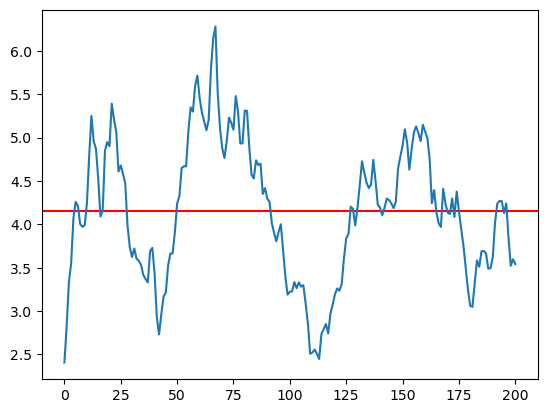

In [5]:
fig, ax = plt.subplots()

ax.axhline(y=np.mean(prec_over_time), color = 'r', label = 'mean')
ax.plot(prec_over_time)

In [6]:
## TODO : better put the null values to nan so that they don't interfere when looking at mean (np.nanmean)
#prec_shape = np.shape(prec)
#prec_no_null = prec[np.where(prec!=0)].reshape(prec_shape)
#print(np.shape(prec_no_null))
#prec_no_null_over_time = np.mean(prec_no_null[:], axis = (1,2))
#prec_no_null_over_xy = np.mean(prec_no_null, axis = (0))


In [7]:
intense_idx = [i for i in range(len(prec_over_time)) if prec_over_time[i]>np.mean(prec_over_time)]
calm_idx = [i for i in range(len(prec_over_time)) if i not in intense_idx]

print(intense_idx)


[5, 6, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 168, 169, 172, 174, 175, 192, 193, 194, 196]


In [8]:
high_prec_timestop = [(10,28), (50,92), (127, 175)]
low_prec_timestop = [(0,10), (28,50), (92, 127), (175,200)]
data_label = []
for i in range(7):
    a = "low" if i%2==0 else "high"
    data_label.append(a+f" {1+ (i//2)}")
high_rain_idx = [i for i in range(10, 28)] + [i for i in range(50, 92)] + [i for i in range(127, 175)]
low_rain_idx = [i for i in range(len(prec_over_time)) if i not in intense_idx]
low_prec = prec_over_time[low_rain_idx]
high_prec = prec_over_time[high_rain_idx]

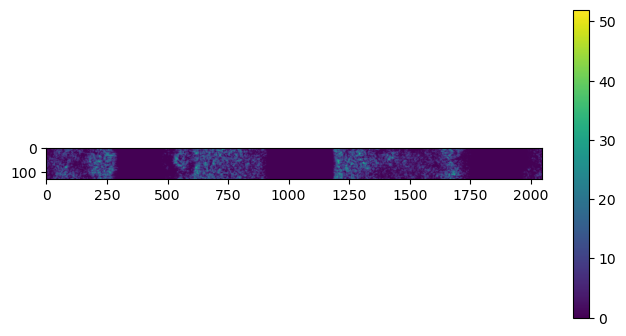

In [9]:
fig = plt.figure(figsize = (8,4))
plt.imshow(prec_over_xy, cmap='viridis')
plt.colorbar()
plt.show()

In [10]:
data_high = []
data_low = []

for t in high_prec_timestop:
    start,end = t
    nc_t = nc1["Prec"][start:end, :, : ].flatten()
    or_len = len(nc_t)
    nc_t = nc_t[np.where(nc_t!=0)]
    data_high.append(nc_t)
    fin_len = len(nc_t)
    print(f"0 represented {1-(fin_len/or_len)}% of our datasets, now we have {fin_len} points")

for t in low_prec_timestop:
    start,end = t
    nc_t = nc1["Prec"][start:end, :, : ].flatten()
    nc_t = nc_t[np.where(nc_t!=0)]
    data_low.append(nc_t)  

0 represented 0.8951299455430772% of our datasets, now we have 494839 points
0 represented 0.9045186723981585% of our datasets, now we have 1051254 points
0 represented 0.9042143026987711% of our datasets, now we have 1205263 points


In [11]:
dist_linear = cs.Distribution(name = 'high 0', nbins =40)
dist_linear.computeDistribution(sample = data_high[0], vmax = np.max(data_high[0]), vmin = np.min(data_high[0]))
print(len(dist_linear.bins))

41


Text(0, 0.5, 'Cumulative density (CDF)')

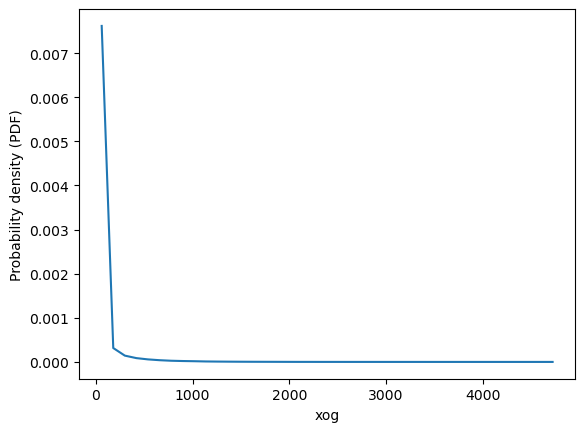

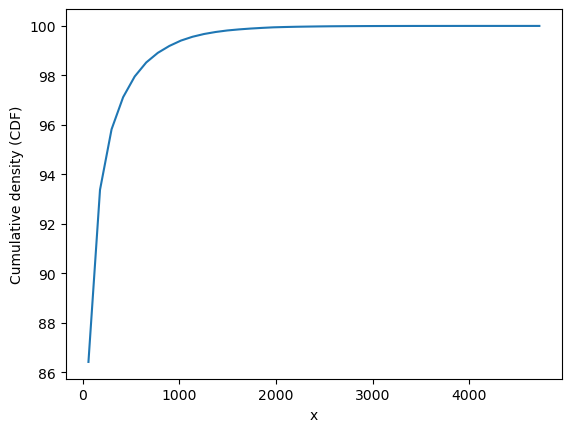

In [12]:
d = dist_linear
plt.plot(d.percentiles,d.density)
plt.xlabel('xog')
plt.ylabel('Probability density (PDF)')
plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

In [13]:
dist_log = cs.Distribution(name = 'high 0', nbins = 140, bintype = 'log')
dist_log.computeDistribution(sample = data_high[0], vmax = np.max(data_high[0]), vmin = np.min(data_high[0])+1e-10)

Text(0.5, 0, 'x')

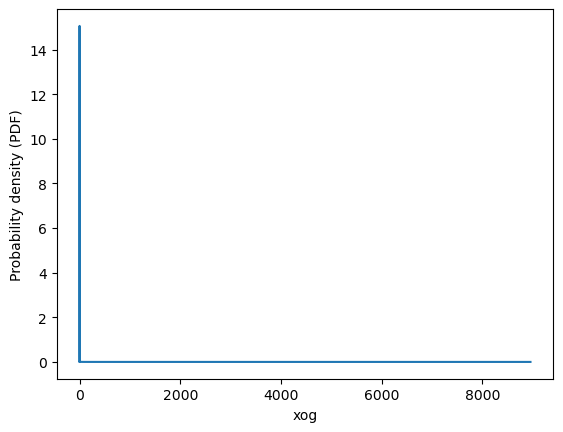

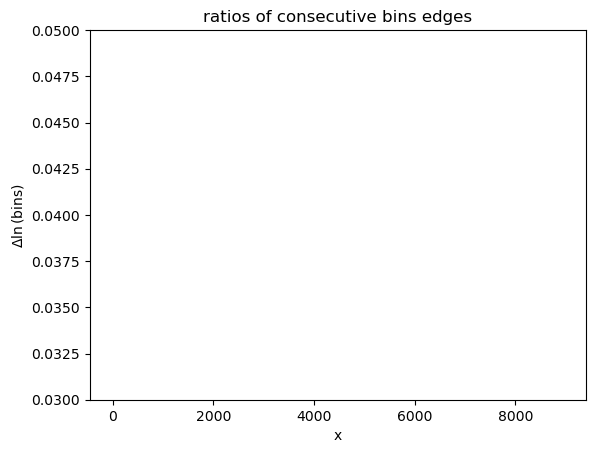

In [14]:
d = dist_log
plt.plot(d.percentiles,d.density)
plt.xlabel('xog')
plt.ylabel('Probability density (PDF)')
plt.figure()

bin_ratios = np.log(d.bins[1:]/d.bins[:-1]) ## Ok j'ai pas compris finalement
plt.plot(d.percentiles,bin_ratios)
# plt.xscale('log')
plt.title('ratios of consecutive bins edges')
plt.ylim((0.03,0.05))
plt.ylabel(r'$\Delta \ln$(bins)')
plt.xlabel('x')

In [15]:
dist_linQ = cs.Distribution(name='x',bintype='linQ')
dist_linQ.computeDistribution(sample = data_high[0], vmax = np.max(data_high[0]), vmin = np.min(data_high[0]))

Text(0, 0.5, 'Cumulative density (CDF)')

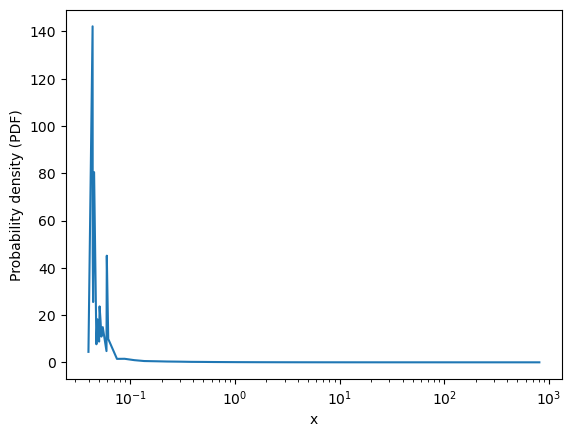

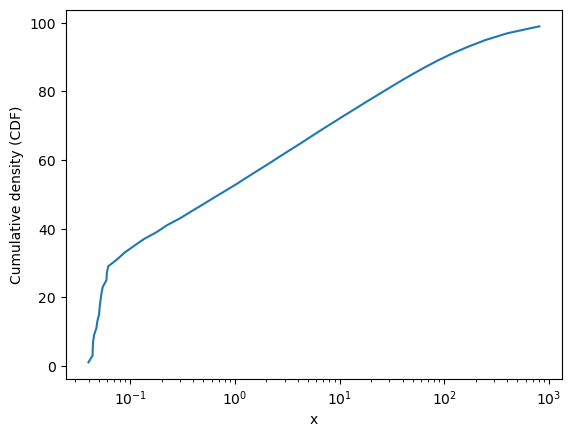

In [16]:
d = dist_linQ
plt.plot(d.percentiles,d.density) ## MJC : Petit souci avec les density qui ne devraient vraiment pas dépasser 1 ? 
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

In [17]:
dist_invlogQ = cs.Distribution(name='x',bintype='invlogQ',nd=4,fill_last_decade=True)
dist_invlogQ.computeDistribution(sample = data_high[0], vmax = np.max(data_high[0]), vmin = np.min(data_high[0]))

Text(0, 0.5, 'Cumulative density (CDF)')

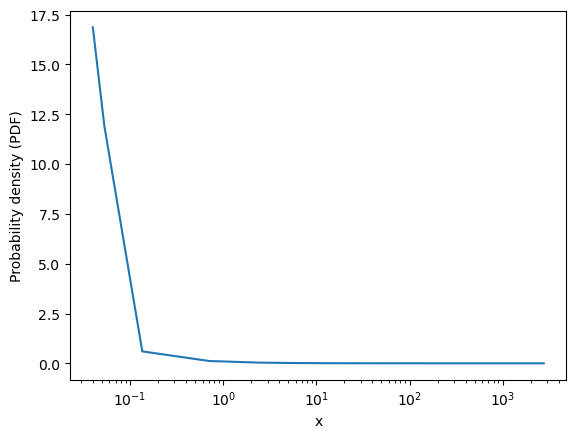

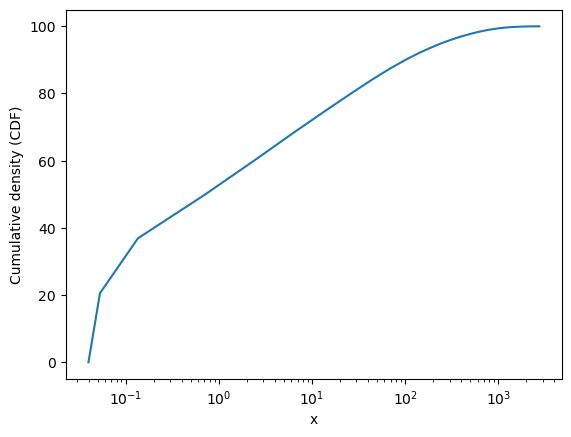

In [18]:
d = dist_invlogQ
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

check that the curve bounds match
x bounds: 0.0 99.99
y bounds: 0.039905741810798645 2756.880811181611

check that the curve bounds match
x bounds: 0.0 99.99
y bounds: 0.039905741810798645 2756.880811181611



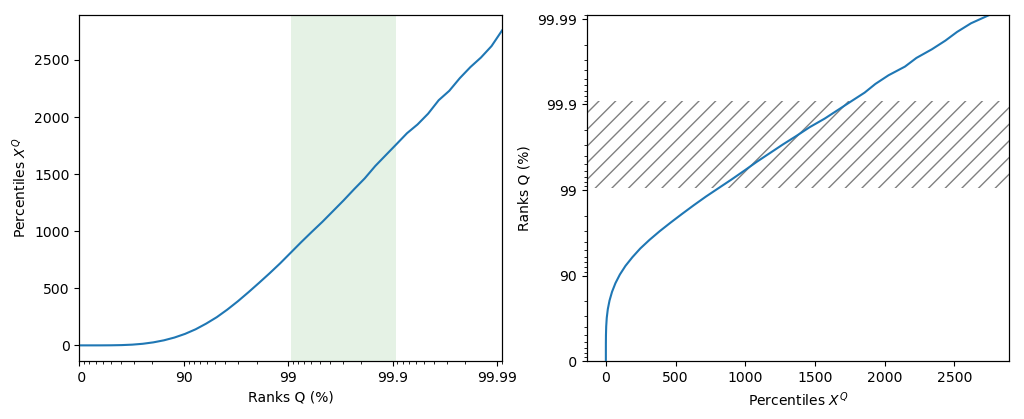

In [19]:
fig,axs = plt.subplots(ncols=2,figsize=(12,4.5))

ranks = d.ranks
perc = d.percentiles

#--- on IL x axis
ax=axs[0]
ax_show = ax.twiny()

#- set frame
setXaxisIL(ax,ranks)
#- show data
y = d.percentiles
showData(ax_show,ranks,perc)
#- add hatch
# addXHatch(ax_show,d.ranks,[20,30])
addXHatch(ax_show,ranks,[20,30],fill=True,hatch=None,alpha=0.1,color='g')

#- labels
ax.set_xlabel('Ranks Q (%)')
ax.set_ylabel('Percentiles $X^Q$')

print('check that the curve bounds match')
print('x bounds:',ranks[0],ranks[-1])
print('y bounds:',perc[0],perc[-1])
print()

#--- on IL y axis
ax=axs[1]
ax_show = ax.twinx()

#- set frame
setYaxisIL(ax,ranks)
#- show data
y = d.percentiles
showData(ax_show,ranks,perc,axisIL='y')
#- add hatch
addYHatch(ax_show,ranks,[20,30])

#- labels
ax.set_xlabel('Percentiles $X^Q$')
ax.set_ylabel('Ranks Q (%)')


print('check that the curve bounds match')
print('x bounds:',d.ranks[0],d.ranks[-1])
print('y bounds:',y[0],y[-1])
print()

In [20]:
prec_t = []
for arr in prec: 
    x = arr.flatten()
    prec_t.append(x[np.where(x!=0)])
prec_t = np.array(prec_t, dtype = object)


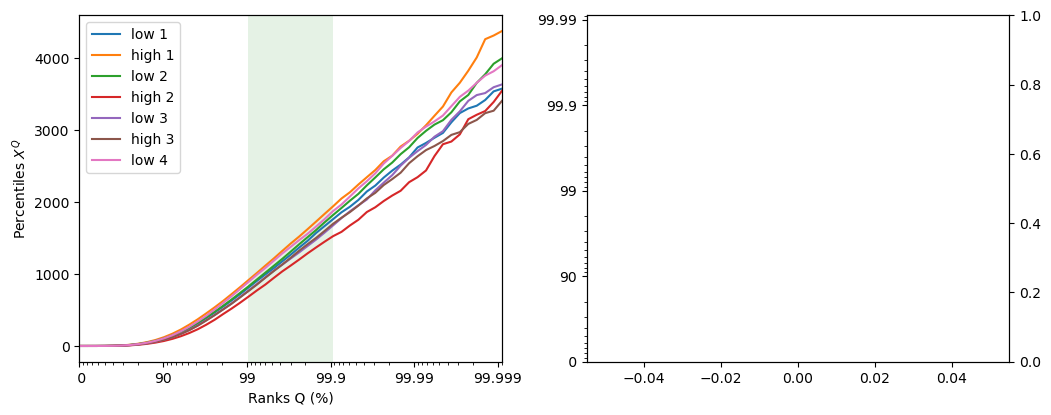

In [28]:
fig,axs = plt.subplots(ncols=2,figsize=(12,4.5))

ax_show_x = axs[0].twiny()
ax_show_y = axs[1].twinx()
for i,x in enumerate(data_high+data_low): #replace with prec_t for timestep_wise
    #print("number of rainy events for this dataset", x.shape)
    d = cs.Distribution(name=f"{i+1}th timestep",bintype='invlogQ',nd=5, fill_last_decade=True)
    d.computeDistribution(sample = x, vmin = x.min(), vmax = x.max())
    #--- on IL x axis
    ranks = d.ranks
    perc = d.percentiles
    #- set frame
    if i == 0 : 
        setXaxisIL(axs[0],ranks) ## replace with setFrame
        setYaxisIL(axs[1],ranks)
    showData(ax_show_x,ranks,perc, rankmax =99.999, label = data_label[i])
    #showData(ax_show_y,ranks,perc,axisIL='y')

    #- add hatch
    # addXHatch(ax_show,d.ranks,[20,30])


#- labels
axs[0].set_xlabel('Ranks Q (%)')
axs[0].set_ylabel('Percentiles $X^Q$')
ax_show_x.legend()
#ax.set_xlabel('Percentiles $X^Q$')
#ax.set_ylabel('Ranks Q (%)')

# add hatches
addXHatch(ax_show_x,ranks,[20,30],fill=True,hatch=None,alpha=0.1,color='g')
addYHatch(ax_show_y,ranks,[20,30])